In [42]:
import wfdb
import scipy
import numpy as np

from matplotlib import pyplot as plt
import math
from statsmodels.graphics import tsaplots
import statsmodels.api as sm

from FeatureExtraction_NB import processing

In [43]:
patient_1 = wfdb.rdrecord('..//01.Dataset/104/s0306lre', channels=[1])
patient_2 = wfdb.rdrecord('..//01.Dataset/117/s0291lre', channels=[1])
patient_3 = wfdb.rdrecord('..//01.Dataset/122/s0312lre', channels=[1])
patient_4 = wfdb.rdrecord('..//01.Dataset/166/s0275lre', channels=[1])
patient_5 = wfdb.rdrecord('..//01.Dataset/173/s0305lre', channels=[1])
patient_6 = wfdb.rdrecord('..//01.Dataset/182/s0308lre', channels=[1])
patient_7 = wfdb.rdrecord('..//01.Dataset/234/s0460_re', channels=[1])
patient_8 = wfdb.rdrecord('..//01.Dataset/238/s0466_re', channels=[1])
patient_9 = wfdb.rdrecord('..//01.Dataset/255/s0491_re', channels=[1])
patient_10 = wfdb.rdrecord('..//01.Dataset/252/s0487_re', channels=[1])


signal_1 = patient_1.p_signal[: ,0]
signal_2 = patient_2.p_signal[:, 0]
signal_3 = patient_3.p_signal[:, 0]
signal_4 = patient_4.p_signal[:, 0]
signal_5 = patient_5.p_signal[:, 0]
signal_6 = patient_6.p_signal[:, 0]
signal_7 = patient_7.p_signal[:, 0]
signal_8 = patient_8.p_signal[:, 0]
signal_9 = patient_9.p_signal[:, 0]
signal_10 = patient_10.p_signal[:, 0]

signal_1,_,_ = processing(signal_1)
signal_2,_,_ = processing(signal_2)
signal_3,_,_ = processing(signal_3)
signal_4,_,_ = processing(signal_4)
signal_5,_,_ = processing(signal_5)
signal_6,_,_ = processing(signal_6)
signal_7,_,_ = processing(signal_7)
signal_8,_,_ = processing(signal_8)
signal_9,_,_ = processing(signal_9)
signal_10,_,_ = processing(signal_10)

In [44]:
print(len(signal_1))
print(len(signal_2))

115200
115200


In [45]:
type(signal_1[0])

numpy.float64

In [46]:
#apply AC and DCT 
def nonFiducial(signal):
    Auto_corr=sm.tsa.acf(signal,nlags=len(signal))
    
    s1=Auto_corr[:1100]

    DcT=scipy.fftpack.dct(s1,type=2)

    # take only non zero signal
    dct = DcT[:100]
    
    components=[signal,Auto_corr,s1,DcT,dct]
    return components

In [47]:
arr_components1 = nonFiducial(signal_1)

arr_components2 = nonFiducial(signal_2.tolist())

arr_components = arr_components1 + arr_components2

feature1 =  arr_components1[4]

print(len(feature1))

c:\Users\Samy\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


100


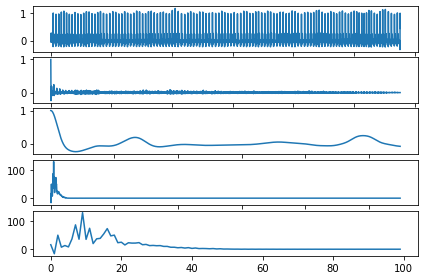

In [48]:
fig , ax = plt.subplots(5)

row= 0 
for i in range(0,5):
    ax[row].plot(arr_components1[i])
    ax[row].set_title("")
    row+=1
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0)

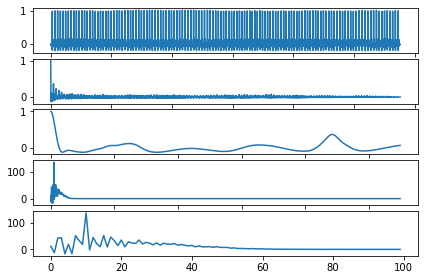

In [49]:
fig , ax = plt.subplots(5)

row= 0 
for i in range(0,5):
    ax[row].plot(arr_components2[i])
    ax[row].set_title("")
    row+=1
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0)

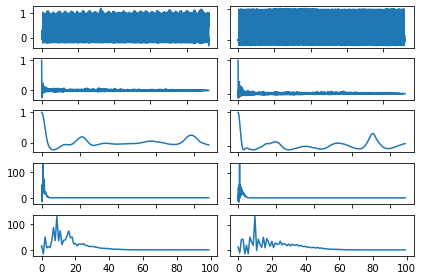

In [50]:
fig , ax = plt.subplots(5,2)

row= 0 
col = 0
count =0
for i in range(0,10):
    ax[row,col].plot(arr_components[i])
    ax[row,col].set_title("")
    count+=1 
    row+=1
    if(count%5 == 0):
        col+=1
        row=0
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0.5,w_pad=0.5)

# Training and Testing

In [51]:
fs = 1000
fs = 1000
# best start = 1300, best end = 3200
patient_1 = wfdb.rdrecord('..//01.Dataset/104/s0306lre', channels=[1])
patient_2 = wfdb.rdrecord('..//01.Dataset/117/s0291lre', channels=[1])
patient_3 = wfdb.rdrecord('..//01.Dataset/122/s0312lre', channels=[1])
patient_4 = wfdb.rdrecord('..//01.Dataset/166/s0275lre', channels=[1])
patient_5 = wfdb.rdrecord('..//01.Dataset/173/s0305lre', channels=[1])
patient_6 = wfdb.rdrecord('..//01.Dataset/182/s0308lre', channels=[1])
patient_7 = wfdb.rdrecord('..//01.Dataset/234/s0460_re', channels=[1])
patient_8 = wfdb.rdrecord('..//01.Dataset/238/s0466_re', channels=[1])
patient_9 = wfdb.rdrecord('..//01.Dataset/255/s0491_re', channels=[1])
patient_10 = wfdb.rdrecord('..//01.Dataset/252/s0487_re', channels=[1])


signal_1 = patient_1.p_signal[: ,0]
signal_2 = patient_2.p_signal[:, 0]
signal_3 = patient_3.p_signal[:, 0]
signal_4 = patient_4.p_signal[:, 0]
signal_5 = patient_5.p_signal[:, 0]
signal_6 = patient_6.p_signal[:, 0]
signal_7 = patient_7.p_signal[:, 0]
signal_8 = patient_8.p_signal[:, 0]
signal_9 = patient_9.p_signal[:, 0]
signal_10 = patient_10.p_signal[:, 0]



time = len(signal_1)/ fs

signal_1,_,_ = processing(patient_1.p_signal[: ,0])
signal_2 ,_,_= processing(patient_2.p_signal[:, 0])
signal_3 ,_,_= processing(patient_3.p_signal[:, 0])
signal_4,_,_ = processing(patient_4.p_signal[:, 0])
signal_5 ,_,_= processing(patient_5.p_signal[:, 0])
signal_6 ,_,_= processing(patient_6.p_signal[:, 0])


time = len(signal_1)/ fs


In [52]:
#apply AC and DCT 
def nonFiducial(signal):
    Auto_corr=sm.tsa.acf(signal,nlags=len(signal))
    
    s1=Auto_corr[:1100]

    DcT=scipy.fftpack.dct(s1,type=2)

    # take only non zero signal
    dct = DcT[:100]
    
    components=[signal,Auto_corr,s1,DcT,dct]
    return components[4]

In [53]:
cmp1 = nonFiducial(signal_1).reshape(100,1)
cmp2 = nonFiducial(signal_2).reshape(100,1)
cmp3 = nonFiducial(signal_3).reshape(100,1)
cmp4 = nonFiducial(signal_4).reshape(100,1)
cmp5 = nonFiducial(signal_5).reshape(100,1)
cmp6 = nonFiducial(signal_6).reshape(100,1)

c:\Users\Samy\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [54]:
import pandas as pd

# samy test


In [55]:
def dfs(non_fid, label):
    df = pd.DataFrame({})
    for i in range(len(non_fid)):
        df[i] = non_fid[i]
    df['label'] = label
    return df

In [56]:
df1 = dfs(cmp1, 1)
df2 = dfs(cmp2, 2)
df3 = dfs(cmp3, 3)
df4 = dfs(cmp4, 4)
df5 = dfs(cmp5, 5)
df6 = dfs(cmp6, 6)


C:\Users\Samy\AppData\Local\Temp/ipykernel_17072/1519452630.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['label'] = label


In [57]:
Data = pd.concat([df1, df3, df4,df2], ignore_index=True)



In [58]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,15.961305,-16.147358,49.957671,7.223245,13.113433,8.156769,36.602683,86.711089,35.503631,130.251751,...,-0.016655,-0.061531,-0.013053,-0.058727,-0.012520,-0.056455,-0.013213,-0.055859,-0.014026,1
1,7.321660,-7.503761,32.308658,29.544112,-3.937882,93.228254,-21.680494,97.314181,30.208803,46.698747,...,-0.127310,-0.042251,-0.125258,-0.043607,-0.124314,-0.042499,-0.128511,-0.046202,-0.124408,3
2,23.483496,-24.200254,71.812292,-3.647732,28.712345,-7.288428,54.612573,72.132035,29.100850,136.257764,...,-0.024903,-0.056303,-0.026165,-0.058353,-0.026380,-0.060306,-0.026173,-0.060035,-0.027397,4
3,11.679354,-12.720458,43.093981,43.208929,-16.348405,18.907453,-16.471820,51.675627,33.412426,18.791809,...,-0.050877,0.027402,-0.031077,-0.010513,-0.036918,-0.016866,-0.062558,-0.004004,-0.081723,2


In [59]:
X = Data.drop('label', axis=1)
y = Data['label']


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [61]:
clf = LogisticRegression()
clf.fit(X, y)


LogisticRegression()

In [62]:
X_test = df2.drop('label', axis=1)
y_test = df2['label']

In [63]:
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [64]:
np.round(probs[0],2)

array([0., 1., 0., 0.])

In [65]:
threshold_percentage = 98

subject_counts = np.bincount(y_pred)
flag = 0
for subject_id, count in enumerate(subject_counts):
    if subject_id == 0:
        continue
    if count > 0:
        # Calculate the percentage of heartbeats classified to the subject
        percentage = (count / len(y_pred)) * 100

        if percentage >= threshold_percentage:
            print(f"Subject {subject_id} identified with {percentage}% certainty.")
            flag = 1
        else:
            print(f"Subject {subject_id} identified, but with {percentage}% certainty below the threshold.")
            
if flag == 0:
    print("subject is undefind")

Subject 2 identified with 100.0% certainty.


In [66]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create and train the SVM classifier
svm_classifier = svm.SVC()
svm_classifier.fit(X, y)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)
y_pred

array([2], dtype=int64)

In [67]:
threshold_percentage = 98

subject_counts = np.bincount(y_pred)
flag = 0
for subject_id, count in enumerate(subject_counts):
    if subject_id == 0:
        continue
    if count > 0:
        # Calculate the percentage of heartbeats classified to the subject
        percentage = (count / len(y_pred)) * 100

        if percentage >= threshold_percentage:
            print(f"Subject {subject_id} identified with {percentage}% certainty.")
            flag = 1
        else:
            print(f"Subject {subject_id} identified, but with {percentage}% certainty below the threshold.")
            
if flag == 0:
    print("subject is undefind")

Subject 2 identified with 100.0% certainty.


In [68]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
random_forest_classifier.fit(X, y)

y_pred = random_forest_classifier.predict(X_test)
probs = random_forest_classifier.predict_proba(X_test)

#Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("prob:", probs)
print(y_pred)

# np.max(probs)


Accuracy: 1.0
prob: [[0.05 0.71 0.1  0.14]]
[2]


In [69]:
falg = 0
for i in range(0,4):
    if(probs[0,i] > 0.5 ):
        print("identfied as subject", y_pred)
        falg = 1 
if (falg == 0):
    print("undefind")
    

identfied as subject [2]


In [70]:
threshold_percentage = 0.5
flag = 0
for i in range(0,len(probs)):
    for subject_id, percentage in enumerate(probs[i]):

        if percentage >= threshold_percentage:
            print(f"Identified as subject {subject_id+1} with {percentage}% certainty.")
            flag = 1
        # else:
        #     print(f"Identified as subject {subject_id+1} , but with {percentage}% certainty below the threshold.")
            
if flag == 0:
    print("subject is undefind")

Identified as subject 2 with 0.71% certainty.
